# Insurance Data Analysis - Exploratory Data Analysis (EDA)


In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sys
import os
import matplotlib 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [50]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [ ]:
from utils import load_data
df = load_data("../data/MachineLearningRating_v3.txt")

c:\Users\gtaye\Documents\10Acadamy\week3\scripts\utils.py:13: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file, delimiter='|') # Delimeter


File successfully converted and saved as ../data/MachineLearningRating_v3.csv


In [18]:
from insurance_data_analysis import InsuranceDataAnalysis

In [20]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [21]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [22]:
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [24]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [40]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

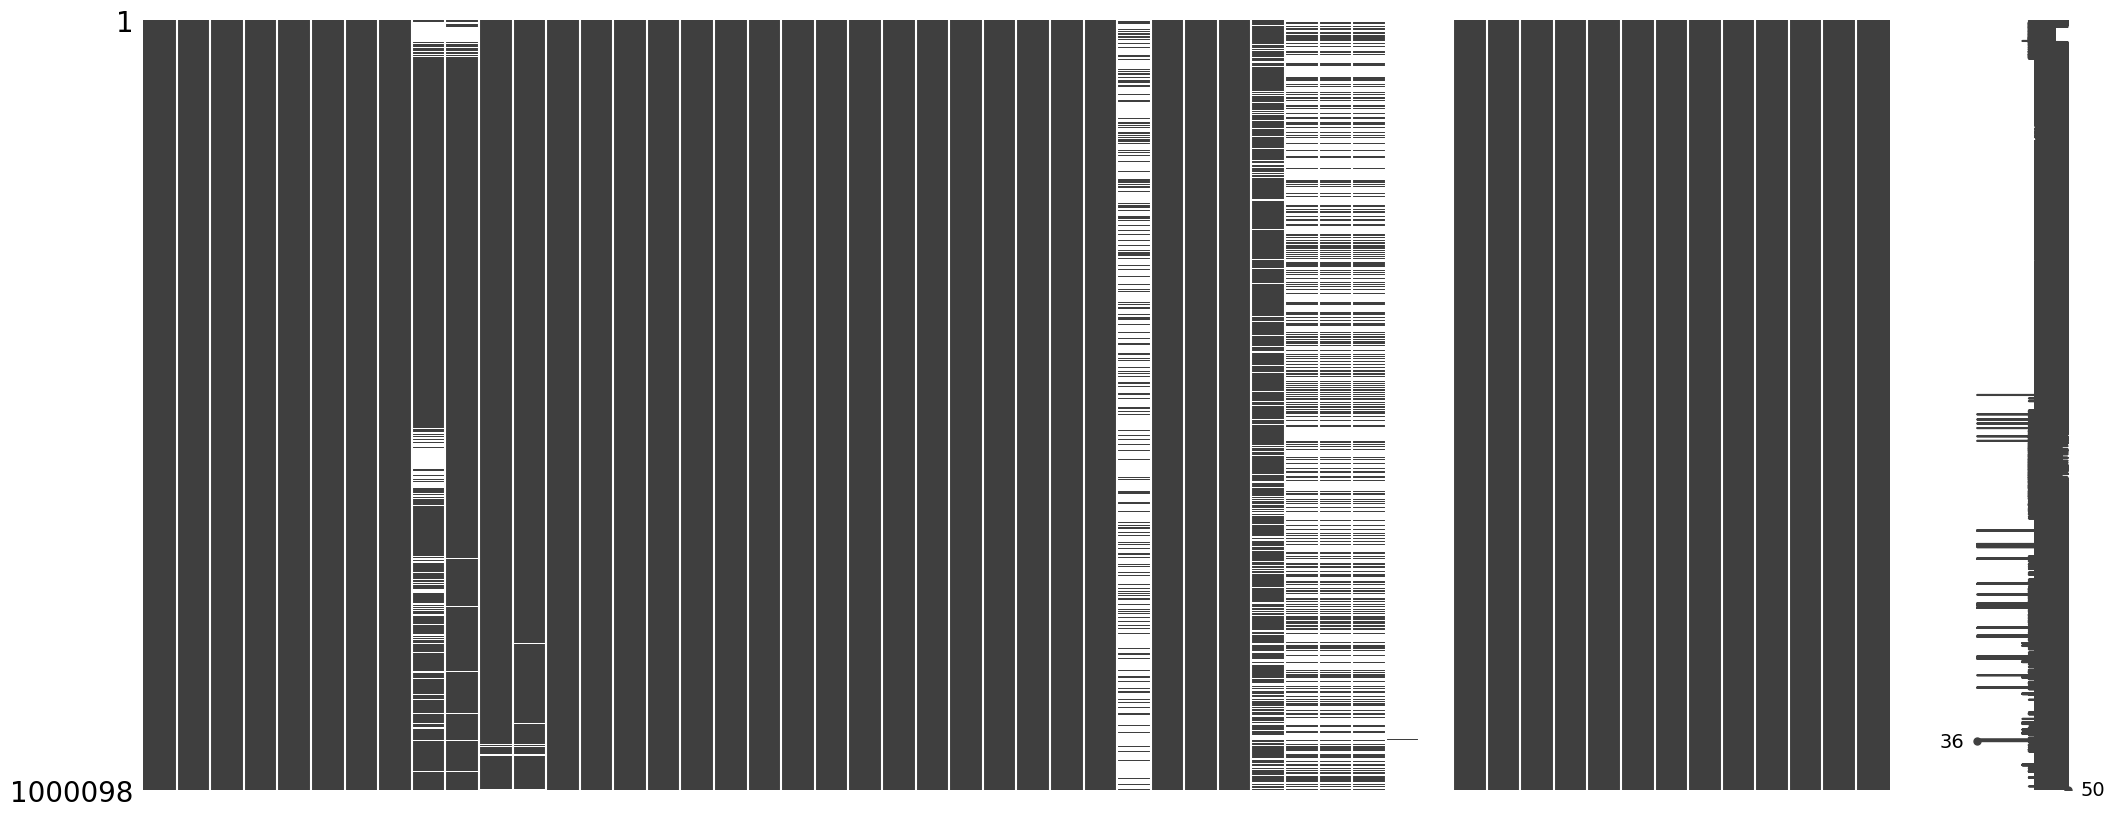

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [30]:
# Visualize missing values
msno.matrix(df)
plt.show()

# Summary of missing values
df.isnull().sum()

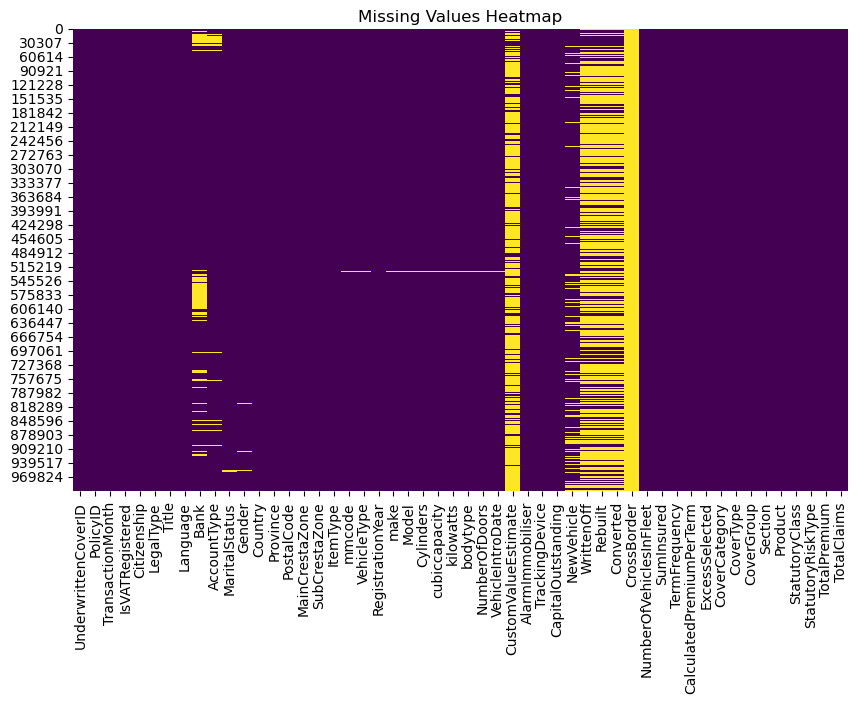

In [ ]:

# Simple heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [37]:
# Example: Filling missing values
df['NumberOfVehiclesInFleet'].fillna(value='default_value', inplace=True)
df['CrossBorder'].fillna(value='default_value', inplace=True)

C:\Users\gtaye\AppData\Local\Temp\ipykernel_7584\2153855580.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CrossBorder'].fillna(value='default_value', inplace=True)


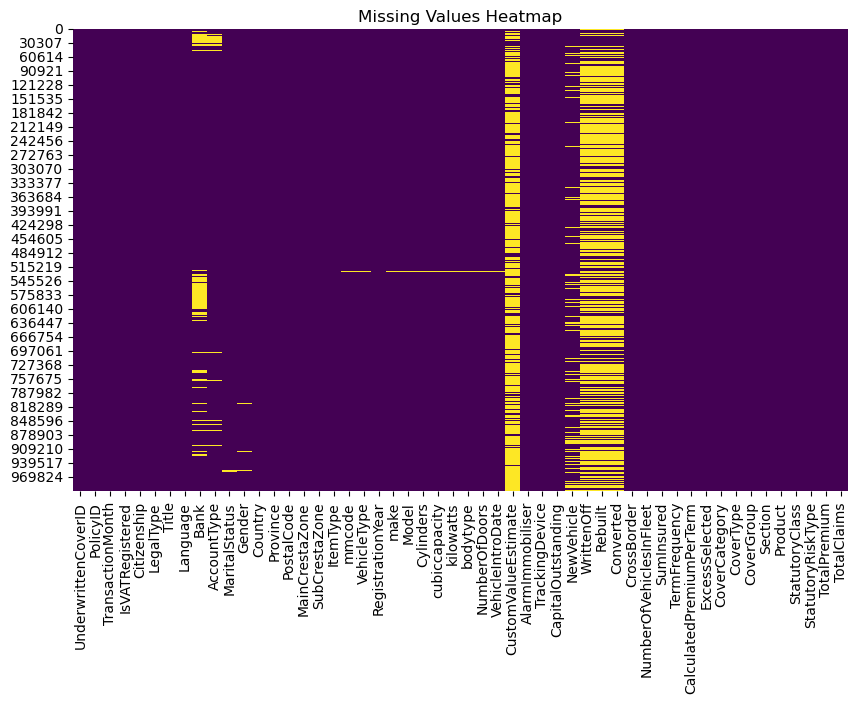

In [38]:
#checking the filled values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [41]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [52]:
# Example: Load your DataFrame
cg = pd.read_csv("../data/MachineLearningRating_v3.csv")  # Replace with your actual file path

C:\Users\gtaye\AppData\Local\Temp\ipykernel_7584\524396932.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  cg = pd.read_csv("../data/MachineLearningRating_v3.csv")  # Replace with your actual file path


In [ ]:
# Initialize the analysis class
analysis = InsuranceDataAnalysis(df)

## Descriptive Statistics
This section provides summary statistics for `Total_Claim` and `Premium` across various segments like province and gender.


In [ ]:
# Generate descriptive statistics
grouped_stats = analysis.descriptive_statistics()
grouped_stats


## Visualizations
Visualize `Total_Claim` and `Premium` distributions across different categories to identify patterns and actionable insights.


In [ ]:
# Visualize total claims by province
analysis.visualize_total_claims_by_province()


In [ ]:
# Visualize premiums by province
analysis.visualize_premiums_by_province()


In [ ]:
# Visualize premium-to-claim ratio by gender
analysis.visualize_premium_to_claim_ratio_by_gender()


In [ ]:
# Visualize premium-to-claim ratio by zipcode
analysis.visualize_premium_to_claim_ratio_by_zipcode()


## Identifying Key Segments
### 1. Profitable Segments
Segments with high premium-to-claim ratios represent profitable groups for the company.

### 2. Low-Risk Targets
Segments with below-average total claims represent potential low-risk groups for premium reductions.


## Analysis of Premium-to-Claim Ratio by Province and Gender

### Overview
This table summarizes the **Average Premium-to-Claim Ratios** (`Avg_Ratio`) and the **Customer Count** (`Count`) across different provinces and genders. These insights are crucial for identifying profitable segments and optimizing marketing strategies.

In [ ]:
# Highlight profitable segments
profitable_segments = analysis.highlight_profitable_segments()
profitable_segments


### Key Insights

1. **Understanding Avg_Ratio:**
   - The `Avg_Ratio` reflects the average ratio of premiums paid to claims made for each segment.
   - A higher ratio indicates that premiums significantly exceed claims, signaling a profitable group for the insurer.

2. **Understanding Count:**
   - The `Count` column shows the number of customers in each segment. Segments with a high count represent a substantial customer base, providing opportunities for large-scale strategies.

### Observations

1. **Profitable Segments:**
   - **Province B (Female)** and **Province C (Female)** exhibit the highest `Avg_Ratio` values (2.37 and 2.32, respectively). These groups are highly profitable, as premiums exceed claims by more than double on average.
   - These segments could be targeted with premium reductions to attract more customers while maintaining profitability.

2. **Balanced Segments:**
   - **Province A (Female)** and **Province C (Male)** have lower `Avg_Ratio` values (1.63 and 1.57, respectively). While these groups are profitable, they are less over-insured compared to others.
   - These segments could benefit from stable premiums to ensure customer retention.

3. **Marketing Opportunities:**
   - **Province B (Male)** has a significant `Avg_Ratio` of 1.72 and a moderate customer base of 156. This segment offers opportunities for expansion through targeted marketing campaigns.

4. **High-Count Segments:**
   - Segments with high customer counts, such as **Province A (Female)** with 176 customers, provide opportunities for broader marketing campaigns or customer satisfaction initiatives.

### Strategic Recommendations

1. **Optimize Marketing for High Avg_Ratio Segments:**
   - Focus on **Province B (Female)** and **Province C (Female)** for marketing campaigns that offer premium discounts or loyalty incentives to attract more customers without risking profitability.

2. **Retention Strategies for Balanced Segments:**
   - Maintain competitive premiums for **Province A (Female)** and **Province C (Male)** to ensure customer retention and explore cross-selling opportunities.

3. **Expand in Profitable Male Segments:**
   - **Province B (Male)** offers potential for growth. Target this group with customized marketing efforts to increase market share.


## Identifying Low-Risk Targets for Premium Reduction

### Overview
This analysis aims to identify **low-risk segments**—groups with below-average total claims. These groups are potential targets for premium reductions, which can attract new clients without significantly increasing the insurer's risk exposure.

In [ ]:
# Identify low-risk targets
low_risk_targets = analysis.identify_low_risk_targets()
low_risk_targets


### Key Insights

1. **Understanding Low-Risk Segments:**
   - Low-risk segments are defined as groups where the average total claims (`Avg_Total_Claim`) are significantly below the overall average.
   - These groups offer opportunities for premium reductions while maintaining profitability.

2. **Highlighted Low-Risk Segments:**
   - The analysis identified the following low-risk segments:
     - **Province B (Female):** `Avg_Total_Claim = 904.85`
     - **Province C (Female):** `Avg_Total_Claim = 739.59`
     - **Province C (Male):** `Avg_Total_Claim = 917.09`
   - These segments exhibit lower-than-average total claims and present a good balance between risk and opportunity.

3. **Comparing Premiums:**
   - Despite lower claims, the premium values (`Avg_Premium`) for these segments are competitive:
     - **Province B (Female):** `Avg_Premium = 1242.24`
     - **Province C (Female):** `Avg_Premium = 956.30`
     - **Province C (Male):** `Avg_Premium = 968.13`
   - This indicates that premium reductions in these groups can attract new clients while ensuring sustained profitability.

4. **Count of Customers:**
   - Customer counts in these low-risk segments are significant, providing a substantial base for potential premium adjustments:
     - **Province B (Female):** `170 customers`
     - **Province C (Female):** `165 customers`
     - **Province C (Male):** `154 customers`

### Observations

1. **Province C Dominance:**
   - Province C, for both genders, consistently shows low `Avg_Total_Claim` values, making it an ideal region for premium adjustments.
   
2. **Balanced Premiums in Province B:**
   - Although the claims in **Province B (Female)** are low, the average premium is high, suggesting a high-profit potential. Adjustments here can attract new clients while ensuring profitability.

3. **Gender-Based Patterns:**
   - Females in **Province B** and **Province C** exhibit significantly lower average claims compared to their male counterparts, presenting an opportunity for targeted marketing strategies.

### Strategic Recommendations

1. **Target Low-Risk Segments for Premium Reductions:**
   - Focus on **Province B (Female)** and **Province C (Female and Male)** as they offer a balance of low claims and competitive premiums.

2. **Region-Specific Marketing Campaigns:**
   - Develop marketing campaigns for **Province C**, highlighting reduced premiums for both genders to attract more clients in this low-risk region.

3. **Retain Profitability in Province B:**
   - For **Province B (Female)**, carefully evaluate the impact of premium reductions on profitability before implementation.



